# CLIM 680 Climate Data 

## Assignment 2: Create a 12-panel plot of the climatology of our data
Dataset: Daily Soil Moisture from ESA Climate Change Initiative (CCI) SM v06.1 (Temporal Resolution: 2011-2020, Spatial Resolution: 0.25°, Case study: Global)

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature

Load data




In [2]:
file = '/scratch/ntavakol/ntavakol/CCI_Final/CCI/ESACCI.nc'
ds=xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:         (time: 3653, lon: 1440, lat: 720)
Coordinates:
  * time            (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
  * lon             (lon) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * lat             (lat) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
Data variables:
    sm              (time, lat, lon) float32 ...
    sm_uncertainty  (time, lat, lon) float32 ...
    flag            (time, lat, lon) float32 ...
    freqbandID      (time, lat, lon) float32 ...
    dnflag          (time, lat, lon) float32 ...
    mode            (time, lat, lon) float32 ...
    sensor          (time, lat, lon) float32 ...
    t0              (time, lat, lon) datetime64[ns] ...
Attributes: (12/44)
    CDI:                          Climate Data Interface version 1.9.10 (http...
    Conventions:                  CF-1.7
    source:                       WARP 5.5R1.1/AMI-WS/ERS12 Level 2 Soil Mois...
    institution:                  Technical University of Vienna (AUT); Vande...
    title:                        ESA CCI Surface Soil Moisture COMBINED acti...
    contact:                      cci_sm_contact@eodc.eu
    ...                           ...
    geospatial_lat_resolution:    0.25 degree
    geospatial_lon_resolution:    0.25 degree
    spatial_resolution:           25km
    time_coverage_start_product:  19781101T000000Z
    time_coverage_end_product:    20201231T235959Z
    CDO:                          Climate Data Operators version 1.9.10 (http...

Calculate Monthly means

In [3]:
ds_sm=ds.groupby('time.month').mean()
ds_sm

<xarray.Dataset>
Dimensions:         (lon: 1440, lat: 720, month: 12)
Coordinates:
  * lon             (lon) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * lat             (lat) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * month           (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sm              (month, lat, lon) float32 nan nan nan nan ... nan nan nan
    sm_uncertainty  (month, lat, lon) float32 nan nan nan nan ... nan nan nan
    flag            (month, lat, lon) float32 nan nan nan nan ... nan nan nan
    freqbandID      (month, lat, lon) float32 nan nan nan nan ... nan nan nan
    dnflag          (month, lat, lon) float32 nan nan nan nan ... nan nan nan
    mode            (month, lat, lon) float32 nan nan nan nan ... nan nan nan
    sensor          (month, lat, lon) float32 nan nan nan nan ... nan nan nan

Text(0.5, 0.98, 'Volumetric Soil Moisture from ESA CCI SM v06.1')

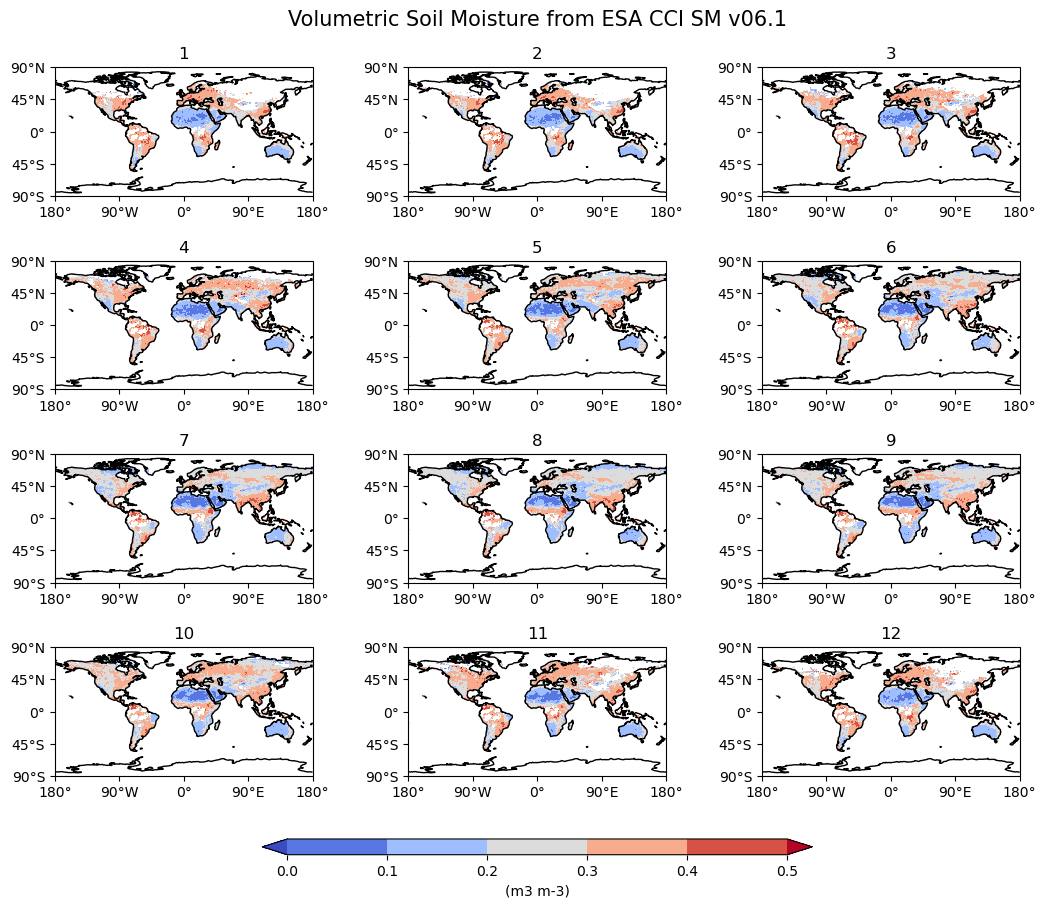

In [6]:
# Define the figure and each axis for the 4 rows and 3 columns
fig, axs = plt.subplots(nrows=4,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,10.5))

# We will flatten 2 dimensional array of `GeoAxes into a 1-D array
axs=axs.flatten()

#Loop over all of the month and plot
for i,sm in enumerate(ds_sm['month']):

        # Select the season
        data=ds_sm['sm'].sel(month=sm)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds_sm['lon'])

        # Contour plot
        clevs=np.arange(0,0.6,0.1)
        cs=axs[i].contourf(lons,ds_sm['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,90), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,45), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(sm.values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.925, left=0.05, right=0.95,
                    wspace=0.25, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.175, 0.5, 0.015])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='(m3 m-3)')

# Add a big title at the top
plt.suptitle('Volumetric Soil Moisture from ESA CCI SM v06.1',fontsize=15)